In [2]:
import pandas as pd
import statistics
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm
import pylab as py
import matplotlib.pyplot as plt

In [3]:
#read in counts data
counts_raw = pd.read_table("all_annotated.csv", sep=None)
counts_raw

/Users/cmdb/miniconda3/lib/python3.7/site-packages/pandas/io/parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [4]:
#subset counts data by those genes whose expression values have a median > 0
bool = [] 
for i in range(len(counts_raw.index)):
    bool.append(statistics.median(counts_raw.iloc[i,2:]) > 0)
bool
counts_raw = counts_raw.iloc[bool,]
counts_raw

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507


In [5]:
#apply log2(RPKM + 0.1) to counts
counts = counts_raw
counts.iloc[:,2:] = counts_raw.iloc[:,2:] + 0.1
counts

/Users/cmdb/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.812564,12.067821,20.867498,13.666818,18.902116,26.902691,22.919895,11.782728,21.994249,14.022059,16.582141,12.722680,31.900016,22.983186,14.430216,17.302570
8,FBtr0113885,Parp,11.097173,0.100000,0.100000,0.100000,14.905335,0.100000,17.701667,10.829349,0.100000,0.100000,14.988651,14.618989,20.443670,4.187385,0.100000,25.384622
9,FBtr0301810,Alg-2,19.167924,0.100000,14.932370,27.893905,22.390230,7.946396,13.939143,13.005621,18.670707,3.019183,18.502807,26.531841,27.564781,7.532775,7.449162,22.892486
10,FBtr0113895,Tim17b,6.415716,4.035390,6.344336,70.042917,67.308557,7.705970,75.079057,53.840307,44.847662,16.934093,53.028318,78.050165,80.905580,31.963932,49.221342,77.708521
11,FBtr0345179,Tim17b,119.425905,11.731035,120.237291,75.878061,72.915582,123.949213,81.334352,59.757963,48.580839,18.338514,57.443983,86.786310,87.646967,34.622255,53.319402,85.036600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.441347,1.156151,9.932860,414.972559,102.629091,25.548748,71.850275,123.275087,119.870973,0.772975,48.409597,72.016695,237.504190,43.800970,75.545251,167.344049
34665,FBtr0100886,mt:ND1,25.309366,0.738430,21.381239,517.177271,326.413934,54.883924,360.365900,222.475244,306.510706,2.253615,200.818567,392.245020,433.756708,21.721773,92.002115,681.575891
34667,FBtr0100888,mt:lrRNA,2339.413232,34.180185,927.691858,4944.816797,2251.214990,593.844141,2493.188379,1652.094141,2578.925439,76.655481,2175.502344,3736.770654,123.010004,451.378412,692.311304,4556.742090
34684,FBtr0114261,CR41590,0.172563,0.100000,0.196390,0.202807,0.100000,0.100000,0.100000,0.226345,1.002268,0.100000,0.100000,0.262814,0.265381,0.100000,0.100000,0.152507


In [6]:
#apply log2 fold change 
counts.iloc[:,2:] = np.log2(counts.iloc[:,2:])
counts

/Users/cmdb/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [7]:
#remove t_name from count matrix and assign column 1 to row names for sake of DGE
counts = counts.iloc[:,1:]


In [8]:
#set gene names as row names
counts = counts.set_index(counts.columns[0])
counts

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
gene_name,,,,,,,,,,,,,,,,
CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787


/Users/cmdb/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


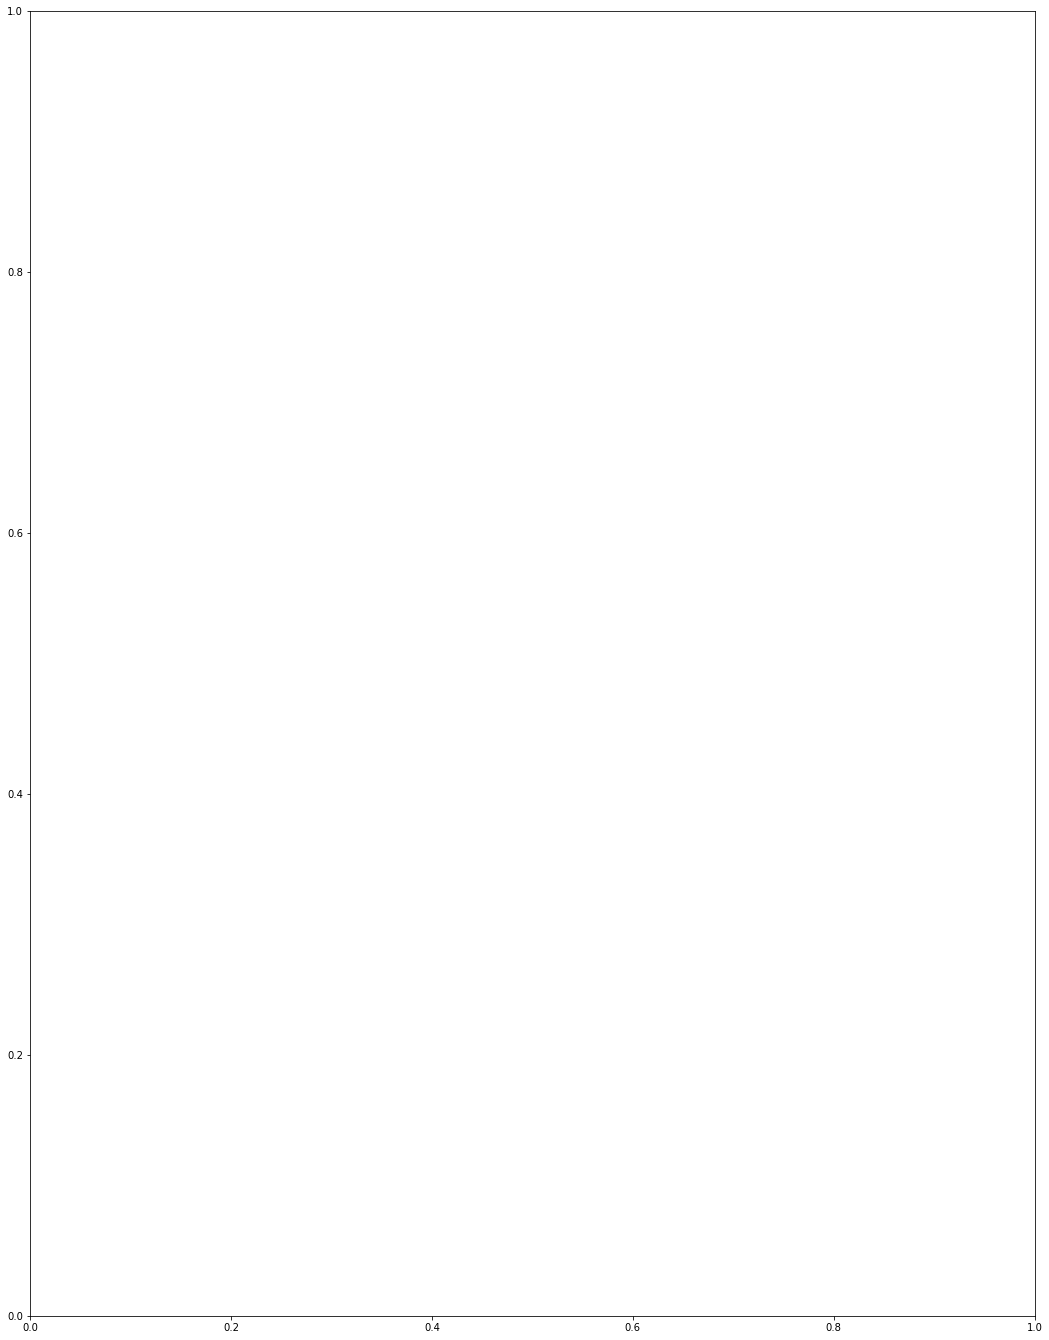

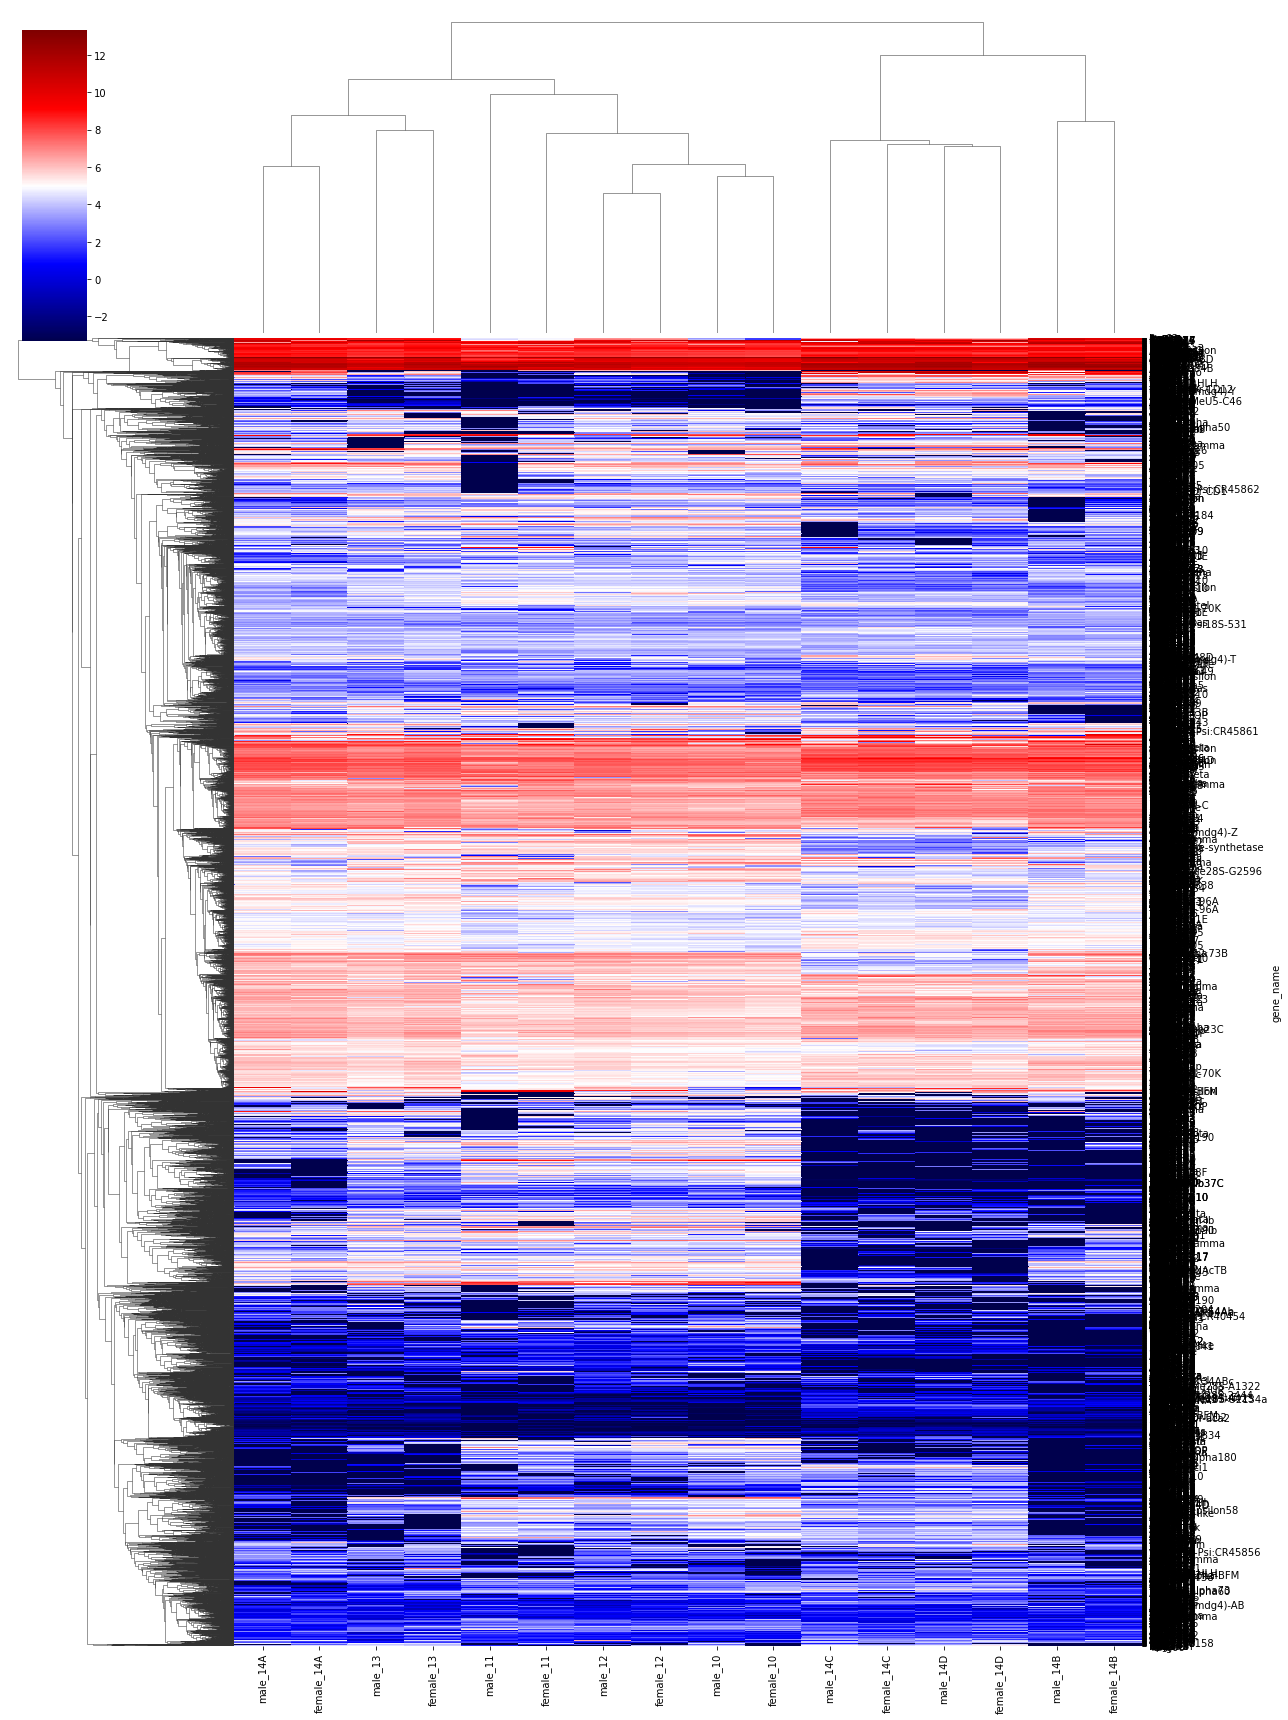

In [9]:
#Clustering a heatmap with dendrogram of both the samples and genes
from bioinfokit import analys, visuz
heatmap = visuz.gene_exp.hmap(df=counts, show = True, dim=(18,24))
heatmap
#note: ignore blank box; look below for the heatmap

In [31]:
#Differential Gene Expression comparing stages
#renaming columns 14A, 14B, etc to just 14
counts.columns = ["10","11","12","13","14","14","14","14","10","11","12","13","14","14","14","14"]

#Use ordinary least squares regression to test for genes that are differentially expressed across stages. 
#conducting differential gene expression analysis to find genes that change across time points
#generating p values for each gene
#for loop to iterate through each gene
p_values = []
for i in range(len(counts)):
        x = counts.iloc[i]
        list1 = [10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14]
        model = sm.OLS(list1,x)
        results = model.fit()
        p_values.append(results.pvalues[0])
#print(results.summary())
#dir(results)

#list of p values
p_values

[6.086536930177248e-14,
 0.389463853319428,
 3.0417169743783e-06,
 1.570697950072567e-10,
 2.1162748780664502e-13,
 7.211699112291625e-07,
 0.30845194721679925,
 0.5104612506132409,
 0.1833257060648323,
 0.037787412524536323,
 0.8685328438580946,
 9.230346199805604e-14,
 0.09695094741813426,
 7.025808688676877e-20,
 6.820055229913638e-20,
 1.0536689913562899e-10,
 0.05185695905664942,
 0.0029766895657408823,
 6.853664893822957e-17,
 1.805927432275195e-07,
 7.844375118780718e-08,
 7.649450383105986e-08,
 2.4578342140266516e-07,
 0.006236691608085938,
 0.04308905415279722,
 0.0291022576811189,
 0.9754509231687429,
 1.619187178736341e-12,
 3.16791429006741e-12,
 0.2982378203586368,
 0.5699314078576017,
 5.618097163656419e-07,
 7.587306596342812e-16,
 3.7857280864070467e-10,
 4.746440111826997e-10,
 0.47165512588394554,
 2.4978124801931063e-11,
 2.7224413210865555e-18,
 3.7004005012407824e-06,
 3.2092278727121624e-10,
 6.07837181954502e-10,
 0.25320442721971137,
 1.1541502475429757e-15,
 2

In [32]:
#make p values into DF with gene names
pval_df = pd.DataFrame(p_values,counts.index)
pval_df.columns = ["p_value"]

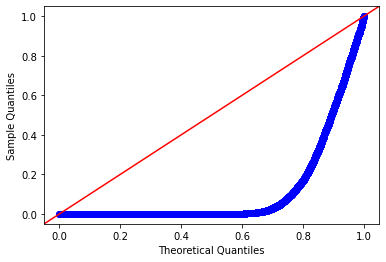

In [33]:
#QQ plot from p values
#sm.qqplot(pval_df.iloc[:,0], line='45')
#above line is incorrect because it compares p values to a normal distribution, not uniform 

#qq plot checking for *uniform* distribution 
from statsmodels.graphics.gofplots import qqplot 
from matplotlib import pyplot as plt 
from scipy.stats import norm, uniform 
import numpy as np

qqplot(pval_df.iloc[:,0],uniform,fit=True,line="45")
plt.show()

In [34]:
#sort p-values
pval_df_sorted = pval_df.sort_values("p_value",0)
pval_df_sorted


,p_value
gene_name,
CG11781,1.728953e-21
Sucb,2.010038e-21
MAGE,2.732973e-21
Sucb,3.708906e-21
CG10555,5.758154e-21
...,...
oys,9.959977e-01
pre-mod(mdg4)-AB,9.995596e-01
Nak,9.997295e-01


In [35]:
#perform B-H procedure to produce adjusted p-values
for i in range(len(pval_df_sorted)):
    pval_df_sorted.iloc[i,0] = pval_df_sorted.iloc[i,0] * len(pval_df_sorted) / (i+1)
    if pval_df_sorted.iloc[i,0] > 1:
        pval_df_sorted.iloc[i,0] = 1
pval_df_sorted

#import statsmodels.stats.multitest
#p_val_adj = sm.stats.multipletests(p_values,alpha=0.05,method='hs',is_sorted=False,returnsorted=True)

#from scipy.stats import rankdata
#rank_pval = rankdata(p_values)
#fdr = p_values * len(p_values) / rank_pval
#fdr[fdr > 1] = 1
#fdr

,p_value
gene_name,
CG11781,1.489147e-17
Sucb,8.656227e-18
MAGE,7.846365e-18
Sucb,7.986201e-18
CG10555,9.918995e-18
...,...
oys,9.964604e-01
pre-mod(mdg4)-AB,9.999079e-01
Nak,9.999617e-01


In [36]:
#identify genes that have an FDR < 10%
pval_bh_sig = pval_df_sorted.loc[pval_df_sorted["p_value"] < 0.1]
pval_bh_sig

,p_value
gene_name,
CG11781,1.489147e-17
Sucb,8.656227e-18
MAGE,7.846365e-18
Sucb,7.986201e-18
CG10555,9.918995e-18
...,...
CG18428,9.972280e-02
CG42542,9.977907e-02
tan,9.982066e-02


In [49]:
#repeat with sex as a covariate
import statsmodels.formula.api as smf
p_values_cov = []
#this is to hold beta values
b_values = []
for i in range(len(counts)):
        x = counts.iloc[i]
        list1 = [10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14]
        list_cov = ["Male","Male","Male","Male","Male","Male","Male","Male","Female","Female","Female","Female","Female","Female","Female","Female"]
        d = {'counts': x, 'stage': list1, 'sex': list_cov}
        d = pd.DataFrame(data=d)
        model = smf.ols('counts ~ stage + sex', data=d)
        results = model.fit()
        p_values_cov.append(results.pvalues[2])
        b_values.append(results.params[2])
p_values_cov

[0.7454787744820427,
 0.1749870671138619,
 0.27412334401282495,
 0.018750619701841227,
 0.22735044963681061,
 0.02793560425167025,
 0.8010167457452906,
 0.9466861020439794,
 0.00015433067986634353,
 0.05456316161867182,
 0.07007357410570807,
 0.511189518931797,
 0.977978257946047,
 4.087391356776449e-06,
 2.899826121627461e-06,
 0.0006110194929409302,
 0.1532208592196028,
 0.5647459329334843,
 0.020376061043861117,
 0.11064313064605637,
 0.18922656810275182,
 0.20008111932206574,
 0.5948859272909202,
 2.5782776853439113e-09,
 0.019216737010125953,
 0.021810251073347955,
 0.09328986888316149,
 0.3435498956423173,
 0.3389083139566924,
 0.0003560330675412827,
 0.00013715103147551573,
 0.276665121346347,
 0.054943141989161455,
 0.002907876230730846,
 2.369682608147564e-07,
 1.6067267814243852e-05,
 0.9701308537519833,
 0.00012779718131042576,
 0.13847237874747362,
 0.163411079680333,
 0.16790382176810817,
 0.35772526057122134,
 0.3928484295169705,
 0.00341034403506672,
 0.01708752962409150

In [50]:
#make p values into DF with gene names
pval_cov_df = pd.DataFrame(p_values_cov,counts.index)
pval_cov_df.columns = ["p_value"]
pval_cov_df["beta"] = b_values
pval_cov_df

,p_value,beta
gene_name,,
CR40182,0.745479,0.026464
Parp,0.174987,0.880440
Alg-2,0.274123,0.388746
Tim17b,0.018751,0.542177
Tim17b,0.227350,0.201195
...,...,...
mt:Cyt-b,0.056993,0.820108
mt:ND1,0.057250,0.942403
mt:lrRNA,0.560402,0.231565


In [51]:
#sort p-values
pval_cov_df_sorted = pval_cov_df.sort_values("p_value",0)
pval_cov_df_sorted
#make a copy of this for the volcano plot
df_vol = pval_cov_df_sorted
df_vol

,p_value,beta
gene_name,,
Ppa,6.477941e-14,2.183072
Ppa,6.477941e-14,2.183072
Ppa,1.140239e-13,2.150359
CG14915,2.904440e-11,2.852146
CG8960,1.323227e-10,1.740305
...,...,...
RpS14a,9.984889e-01,0.000630
CG2924,9.988044e-01,-0.000434
CG7215,9.991187e-01,0.000579


In [52]:
#perform B-H procedure to produce adjusted p-values
for i in range(len(pval_cov_df_sorted)):
    pval_cov_df_sorted.iloc[i,0] = pval_cov_df_sorted.iloc[i,0] * len(pval_cov_df_sorted) / (i+1)
    if pval_cov_df_sorted.iloc[i,0] > 1:
        pval_cov_df_sorted.iloc[i,0] = 1
pval_cov_df_sorted

,p_value,beta
gene_name,,
Ppa,5.579451e-10,2.183072
Ppa,2.789725e-10,2.183072
Ppa,3.273628e-10,2.150359
CG14915,6.253985e-08,2.852146
CG8960,2.279391e-07,1.740305
...,...,...
RpS14a,9.989528e-01,0.000630
CG2924,9.991524e-01,-0.000434
CG7215,9.993508e-01,0.000579


In [53]:
#identify genes that have an FDR < 10%
pval_cov_bh_sig = pval_cov_df_sorted.loc[pval_cov_df_sorted["p_value"] < 0.1]
pval_cov_bh_sig

,p_value,beta
gene_name,,
Ppa,5.579451e-10,2.183072
Ppa,2.789725e-10,2.183072
Ppa,3.273628e-10,2.150359
CG14915,6.253985e-08,2.852146
CG8960,2.279391e-07,1.740305
...,...,...
Hsp83,9.926901e-02,-1.228248
CG6550,9.929445e-02,1.256811
gukh,9.962416e-02,-1.117186


In [54]:
#calculate the percentage overlap between the lists of genes with and without control covariate of sex
pval_bh_sig
pval_cov_bh_sig

#find rows from original DEG list that are also in list with control variable 
length_genes = len(pval_bh_sig[pval_bh_sig.index.isin(pval_cov_bh_sig.index)])
overlap = length_genes / len(pval_bh_sig)
overlap
#approx 52% of genes present when not including control for sex remain when this covariate is introduced 

0.5191171899285049

In [55]:
#prepare table for volcano plot
#using list of all genes, significant and not

#first take -log10 of p values
log_pvals = np.log10(df_vol.iloc[:,0]) * (0-1)
log_pvals

#assign log pvals to dataframe
df_vol.iloc[:,0] = log_pvals
df_vol


,p_value,beta
gene_name,,
Ppa,9.253409,2.183072
Ppa,9.554439,2.183072
Ppa,9.484971,2.150359
CG14915,7.203843,2.852146
CG8960,6.642181,1.740305
...,...,...
RpS14a,0.000455,0.000630
CG2924,0.000368,-0.000434
CG7215,0.000282,0.000579


In [56]:
#assign color values for those genes with a p-value < 0.05 (> 1.3 log10 value) and beta > or < abs(0.5)
colors = []
for i in range(len(df_vol)):
    if df_vol.iloc[i,0] >= 1.3:
        if df_vol.iloc[i,1] >= 0.5:
            colors.append("green")
        if df_vol.iloc[i,1] <= -0.5:
            colors.append("red")
        if df_vol.iloc[i,1] < 0.5 and df_vol.iloc[i,1] > -0.5:
            colors.append("blue")
    if df_vol.iloc[i,0] < 1.3:
        colors.append("blue")
df_vol["colors"] = colors
df_vol

,p_value,beta,colors
gene_name,,,
Ppa,9.253409,2.183072,green
Ppa,9.554439,2.183072,green
Ppa,9.484971,2.150359,green
CG14915,7.203843,2.852146,green
CG8960,6.642181,1.740305,green
...,...,...,...
RpS14a,0.000455,0.000630,blue
CG2924,0.000368,-0.000434,blue
CG7215,0.000282,0.000579,blue


Text(0.5, 1.0, 'Differentially Expressed Genes with Sex as Covariate: Beta by -Log10 Pvalue')

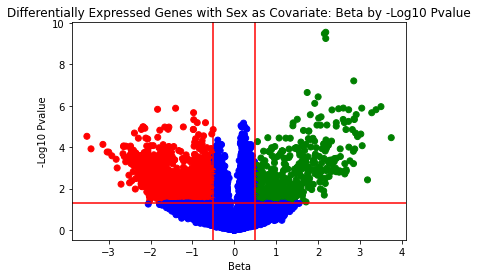

In [57]:
#build volcano plot
plt.scatter(df_vol.iloc[:,1],df_vol.iloc[:,0], c=df_vol.iloc[:,2])
plt.axvline(x=0.5,color="red")
plt.axvline(x=-0.5,color="red")
plt.axhline(y=1.3,color="red")
plt.xlabel("Beta")
plt.ylabel("-Log10 Pvalue")
plt.title("Differentially Expressed Genes with Sex as Covariate: Beta by -Log10 Pvalue")